In [5]:
import pandas as pd
import numpy as np

# Initial Data understanding
A goal in this step is to get to know what types of data cleaning, preparation and encoding we need to do in order to prepare our data for inclusion in a model.

Since we are predicting price, this is a supervised regression problem.

In [2]:
# read from csv file
df=pd.read_csv("../data/Melbourne_housing_FULL.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [4]:
df.shape

(34857, 21)

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [9]:
df.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

In [10]:
# getting number of rows with null price.
# since we are trying to predict price, we will need to drop these. 
print("Total number of rows in data set is: ", df.shape[0])
print("Number of rows with missing price is: ",  df.loc[df.loc[:, "Price"].isnull()].shape[0])

Total number of rows in data set is:  34857
Number of rows with missing price is:  7610


# Data Cleaning

In [14]:
# Dropped the rows where price is null and saved to data
data=df.loc[~df.loc[:,"Price"].isnull()]
data.shape

(27247, 21)

In [15]:
data.loc[:, "Regionname"].isnull().any()

True

In [16]:
# checking to see how many null values we have in each of the other columns
columns_with_nulls = []
for column in data.columns:
    if data.loc[:, column].isnull().any():
        columns_with_nulls.append(column)

for column in columns_with_nulls:
    percent_missing = round(((data.loc[data.loc[:, column].isnull()].shape[0] / data.shape[0]) * 100), 4)
    print("Column {} has {}% missing values \n".format(column, percent_missing))

Column Distance has 0.0037% missing values 

Column Postcode has 0.0037% missing values 

Column Bedroom2 has 23.6393% missing values 

Column Bathroom has 23.6613% missing values 

Column Car has 25.045% missing values 

Column Landsize has 34.0037% missing values 

Column BuildingArea has 60.8911% missing values 

Column YearBuilt has 55.6502% missing values 

Column CouncilArea has 0.011% missing values 

Column Lattitude has 22.953% missing values 

Column Longtitude has 22.953% missing values 

Column Regionname has 0.011% missing values 

Column Propertycount has 0.011% missing values 



In [17]:
# for columns with only a very small amoung of null values, we will simply drop the nulls that are there.
columns_with_few_nulls = ['Distance',
                          'Postcode',
                          'CouncilArea',
                          'Regionname',
                          'Propertycount']
for column in columns_with_few_nulls:
    data = data.loc[~data.loc[:, column].isnull()]

In [18]:
data.shape

(27244, 21)

In [19]:
# updating our "columns_with_nulls" list
columns_with_nulls = []
for column in data.columns:
    if data.loc[:, column].isnull().any():
        columns_with_nulls.append(column)
columns_with_nulls

['Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude']

In [20]:
percent_columns_with_nulls = (len(columns_with_nulls) / len(data.columns)) * 100
print("Percentage of columns still containing missing values: {}".format(percent_columns_with_nulls))

Percentage of columns still containing missing values: 38.095238095238095


# Split Train and Test set

In [21]:

data = data.drop(columns=columns_with_nulls)
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split

# splitting data into features and targets 
x = data.drop(columns="Price")
y = data.loc[:, "Price"]

# Removing 15% of data as holdout
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [23]:
# putting x & y back together for plotting
train_data = pd.concat([x_train, y_train], axis=1)

In [24]:
train_data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount,Price
30365,Footscray,8/4 Empire St,2,u,SP,Barry,9/12/2017,5.1,3011.0,Maribyrnong City Council,Western Metropolitan,7570.0,315000.0
15124,Mentone,70 Voltri St,3,h,S,hockingstuart,3/06/2017,20.0,3194.0,Kingston City Council,South-Eastern Metropolitan,6162.0,885000.0
11934,Oakleigh,1/62 Golf Links Av,3,u,S,Ray,18/03/2017,14.0,3166.0,Monash City Council,Southern Metropolitan,3224.0,849500.0
20766,Preston,38 Spring St,3,h,S,Barry,9/09/2017,8.4,3072.0,Darebin City Council,Northern Metropolitan,14577.0,947500.0
16150,Carlton North,454 Canning St,3,h,S,Nelson,24/06/2017,3.5,3054.0,Melbourne City Council,Northern Metropolitan,3106.0,1717500.0


# Visualizations

In [25]:
train_data.loc[:, 'Suburb'].nunique()

344

In [26]:
train_data.loc[:, 'Postcode'].nunique()

209

In [27]:
train_data.loc[:, 'CouncilArea'].nunique()

33

In [28]:
train_data.loc[:, 'Regionname'].nunique()

8

In [29]:
avg_price_by_suburb = data.groupby("Suburb").mean()['Price'].sort_values(ascending=False)
avg_price_by_councilarea = data.groupby("CouncilArea").mean()['Price'].sort_values(ascending=False)
avg_price_by_region = data.groupby("Regionname").mean()['Price'].sort_values(ascending=False)

In [30]:
avg_price_by_suburb.describe().round()

count        344.0
mean      920490.0
std       345358.0
min       380000.0
25%       659870.0
50%       841956.0
75%      1079125.0
max      2386271.0
Name: Price, dtype: float64

In [31]:
avg_price_by_councilarea.describe().round()

count         33.0
mean      907368.0
std       313692.0
min       414400.0
25%       683237.0
50%       886031.0
75%      1103285.0
max      1667326.0
Name: Price, dtype: float64

In [32]:
avg_price_by_region.describe().round()

count          8.0
mean      855927.0
std       295612.0
min       432607.0
25%       690509.0
50%       849550.0
75%       935443.0
max      1395928.0
Name: Price, dtype: float64

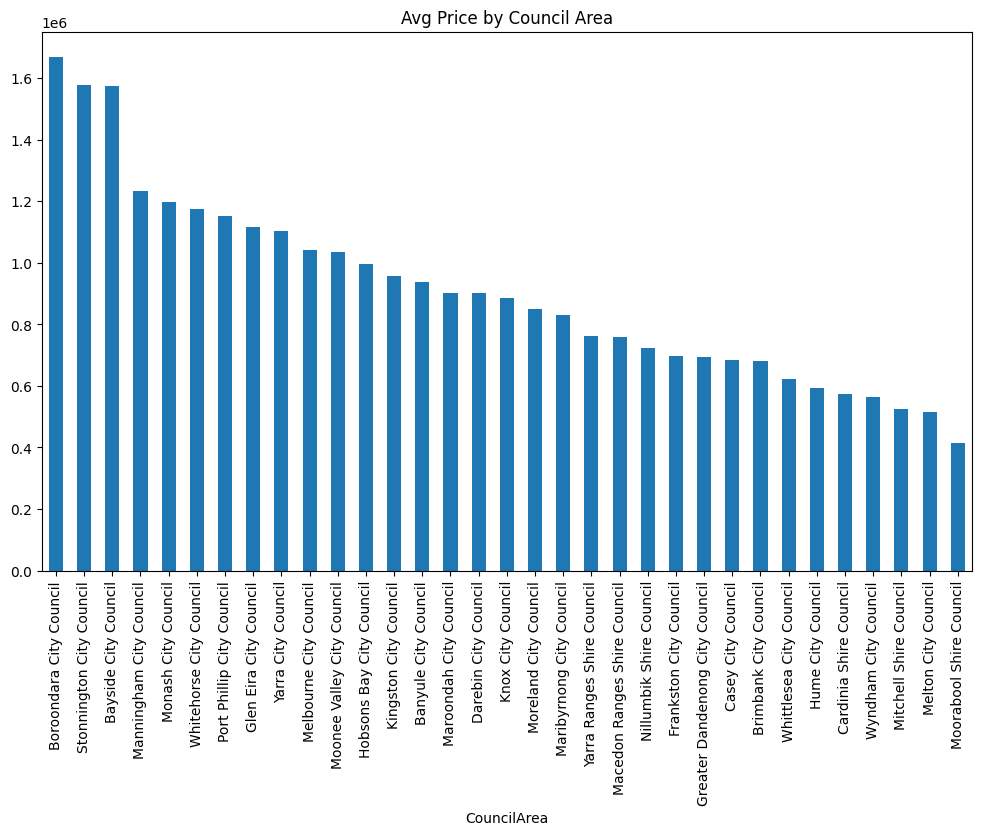

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, figsize=(12,7))

avg_price_by_councilarea.plot(ax=ax, kind='bar')

ax.set_title('Avg Price by Council Area')

fig;

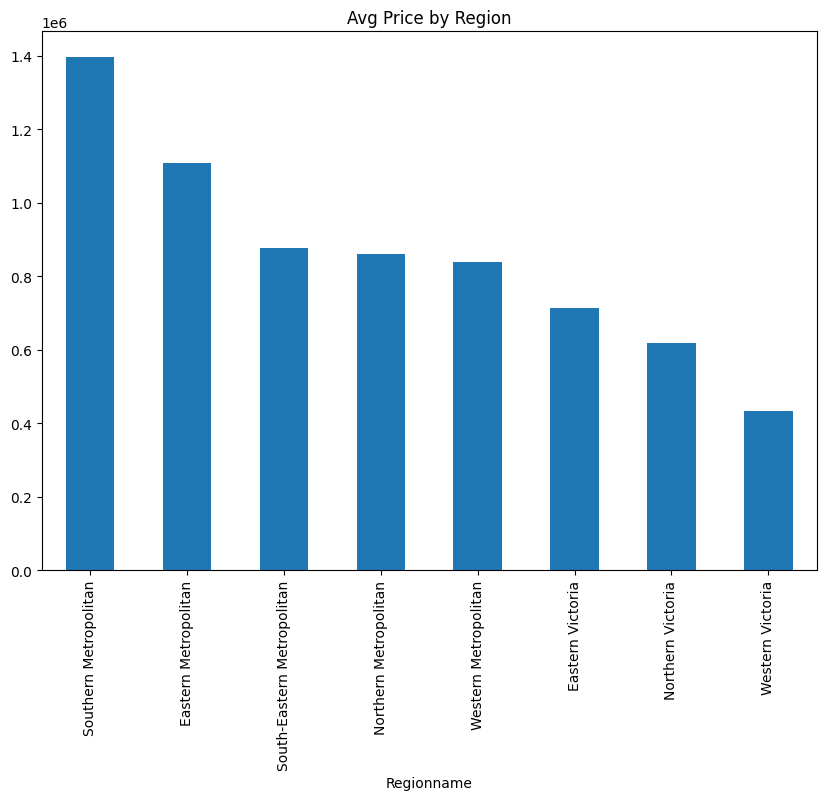

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, figsize=(10,7))

avg_price_by_region.plot(ax=ax, kind='bar')

ax.set_title('Avg Price by Region')

fig;